In [1]:
import numpy as np
import matplotlib.pyplot as plt
#
C = 1e-10
R = 1e11
r = 1e6
V0 = 100e-3
# Spenningspuls
def Vs(t,V0,t0):
    return V0*(t<t0)
# Simuleringsparameter
RC = R*C
rC = r*C
dt = 0.1*rC
T = RC/100.0
t0 = T*0.001
nsteps = int(T/dt)
L = 100
V = np.zeros((nsteps,L))
t = np.zeros((nsteps,1))
V[0,0] = V0
#
for j in range(0,nsteps-1):
    t[j+1] = t[j] + dt
    V[j+1,0] = Vs(t[j+1],V0,t0)
    for i in range(1,L-1):
        V[j+1,i] = V[j,i] + dt*(-V[j,i]/RC + (V[j,i+1]-2*V[j,i]+V[j,i-1])/rC)
    V[j+1,L-1] = V[j,L-1] + dt*(-V[j,L-1]/RC + (-V[j,L-1]+V[j,L-2])/rC)

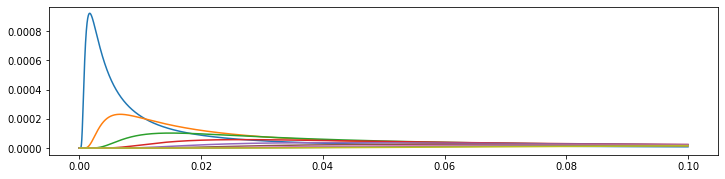

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
for i in range(10,L-1,10):
    plt.plot(t,V[:,i])
plt.xlabel('t')

Text(0.5, 0, 'x')

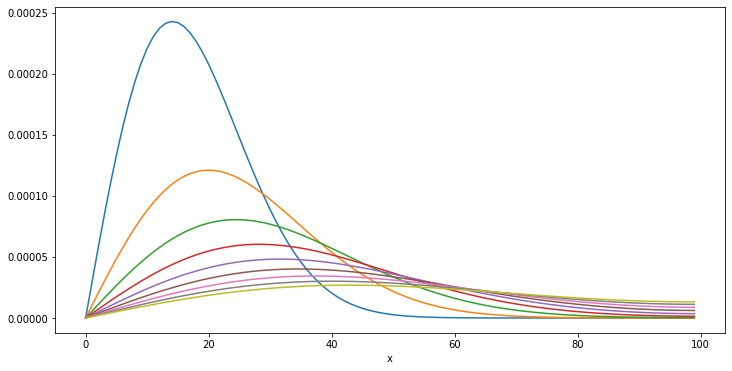

In [9]:
plt.figure(figsize=(12,6))
for j in range(1000,nsteps-1,1000):
    plt.plot(V[j,:])
plt.xlabel('x')

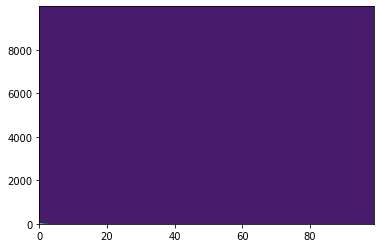